<h3 align="center">Practical 3</h3> <h4 align = "right">14/07/2021</h4>



#### Name: Suryajiraje Bhosale 
#### PRN: 1901202051
#### School: Data Science 
#### Program: Data Science 
#### Year/ Semester: 2/4
#### Subject Name: Machine Learning
#### Subject Code: DS401
#### Title: Naive Bayes

#### Skills/Competencies to be acquired:

1. Model selection
2. Model application
3. Regression Model

#### Duration of activity: 1 Hours

#### 1. What is the purpose of this activity?

The purpose of this activity is to apply naive bayes model and feature selection to get a model is the best fit the dataset.

#### 2. Steps performed in this activity.

1. Import libraries 
2. Import Dataset
3. Basic EDA
4. Regression Analysis

#### 3. What resources / materials / equipment / tools did you use for this activity?

1. Python IDE
2. Data Set
3. Internet
4. Notes


#### 4. What skills did you acquire?

Model Selection, Adequacy, Application

#### 5. Time taken to complete the activity?

1 Hour

#### Variable notes:

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)


survival Survival (0 = No; 1 = Yes)


name Name


sex Sex


age Age


sibsp Number of Siblings/Spouses Aboard


parch Number of Parents/Children Aboard


ticket Ticket Number


fare Passenger Fare (British pound)


cabin Cabin


embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [205]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [206]:
df_train = pd.read_csv('/Users/user/Desktop/titanic_train.csv')

In [207]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,s_M,S_F,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,0.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.0,1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,NaN,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,NaN,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,NaN,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,NaN,NaN,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,NaN,NaN,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,NaN,NaN,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,NaN,NaN,14.0,1,0,237736,30.0708,NaN,C


#### Dropping the s_M and F_M variables because they do not contribute to the classification process:

In [208]:
df_train = df_train.drop(['s_M','S_F'], 1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Finding that variables that have missing values in them and imputing the values using measures of central tendency: 

<AxesSubplot:>

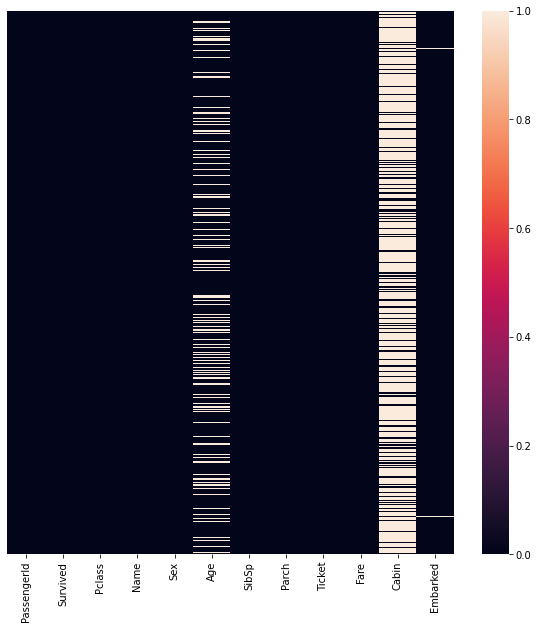

In [209]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.isnull(), yticklabels=False)

In [210]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [211]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [212]:
df_train['Cabin'] = df_train['Cabin'].astype('str')

In [213]:
df_train.Age = df_train.Age.fillna(df_train.Age.mean())

In [214]:
df_train.Cabin = df_train.Cabin.fillna(df_train.Cabin.mode()[0])

In [215]:
df_train.Embarked = df_train.Embarked.fillna(df_train.Embarked.mode()[0])

<AxesSubplot:>

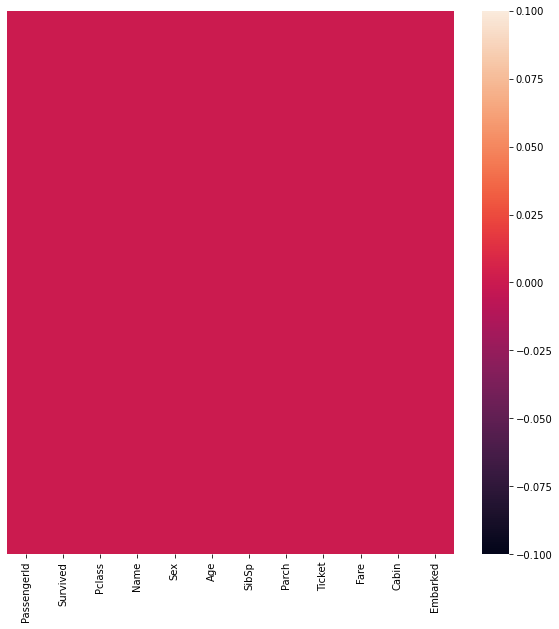

In [216]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.isnull(), yticklabels=False)

In [217]:
df_train.Embarked = df_train.Embarked.fillna(df_train.Embarked.mode()[0])

In [218]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,nan,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,nan,C


In [220]:
df_train.Age.mean()

29.699117647058763

In [221]:
df_train.Sex.value_counts()

male      576
female    313
1           1
0           1
Name: Sex, dtype: int64

#### Imputing the first two rows of sex with adequate values of male and female:

In [231]:
df_train.Sex[df_train.Sex == '1'].index
df_train.Sex[df_train.Sex == '0'].index
df_train.Sex.iloc[0] = 'male'
df_train.Sex.iloc[1] = 'female'
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,nan,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,nan,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,nan,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [232]:
df_train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Creating a binary classification for Sex called Sex_Cleaned. This will aid in using sex as a predictive classifier variable:

In [233]:
df_train['Sex_Cleaned'] = np.where(df_train.Sex == 'male', 0, 1)

#### We can do the same using a label encoder that is already present in the preprocessing library of sklearn:

In [234]:
from sklearn.preprocessing import LabelEncoder

In [235]:
lb = LabelEncoder()
df_train['Embarked_cleaned'] = lb.fit_transform(df_train.Embarked)

#### Now we use the features we need to predict if a person survived or not:

In [240]:
used_features =[
    "Pclass",
    "Sex_Cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]

#### Creating the Naive Bayes model: 

In [248]:
X = df_train[used_features].values
y = df_train.Survived

In [249]:
from sklearn.model_selection import train_test_split

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11, train_size = 0.3, stratify = y)

In [356]:
from sklearn.naive_bayes import GaussianNB

In [357]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('The score for training data is: {:.3f} %'.format(gnb.score(X_train, y_train)*100))
print('The score for test data is: {:.3f} %'.format(gnb.score(X_test, y_test)*100))

The score for training data is: 79.401 %
The score for test data is: 78.846 %


In [358]:
from sklearn import metrics

In [359]:
y_hat = gnb.predict(X_test)

In [360]:
metrics.accuracy_score(y_test, y_hat)

0.7884615384615384

#### Using the model created previously on the test dataset to predict if a person survived or not:

In [361]:
df_test = pd.read_csv('/Users/user/Desktop/titanic_test.csv')

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

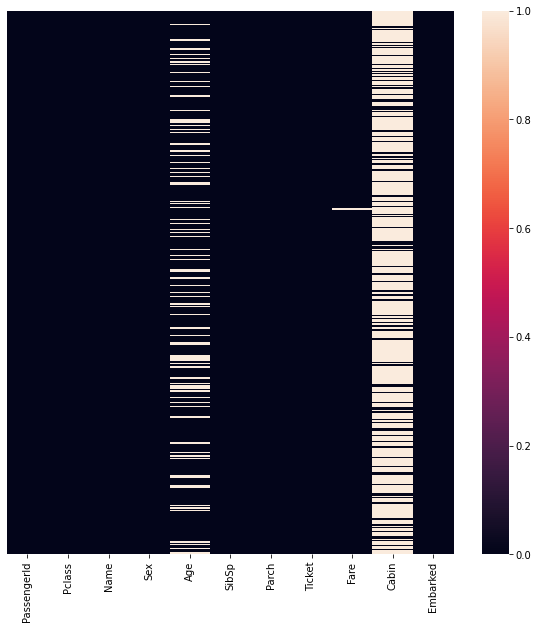

In [364]:
plt.figure(figsize=(10,10))
sns.heatmap(df_test.isnull(), yticklabels=False)
df_test.isnull().sum()

In [365]:
df_test.Age.fillna(df_test.Age.mean(), inplace=True)
df_test.Cabin = df_test.Cabin.astype('str')

In [366]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [367]:
df_test['Cleaned_sex'] = np.where(df_test.Sex == 'male', 0, 1)

In [368]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cleaned_sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,nan,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,nan,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,nan,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,nan,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,nan,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,nan,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,nan,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,nan,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,nan,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,nan,S,0


In [369]:
df_test.Embarked = df_test.Embarked.astype('str')
df_test['Embarked_clean'] = lb.fit_transform(df_test.Embarked)

In [370]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cleaned_sex,Embarked_clean
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,nan,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,nan,S,1,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,nan,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,nan,S,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,nan,S,1,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,nan,S,0,2
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,nan,Q,1,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,nan,S,0,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,nan,C,1,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,nan,S,0,2


In [371]:
used_features =[
    "Pclass",
    "Cleaned_sex",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_clean"
]

In [383]:
X_test_pred = df_test[used_features]

In [384]:
X_test_pred.dropna(axis=0, how = 'any', inplace=True)

In [385]:
X_test_pred.isnull().sum()

Pclass            0
Cleaned_sex       0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked_clean    0
dtype: int64

In [386]:
y_hat_new = gnb.predict(X_test_pred)

In [387]:
y_hat_new = pd.DataFrame(y_hat_new, columns=['clean_survive'])

In [388]:
y_hat_new.value_counts()

clean_survive
0                248
1                169
dtype: int64

In [389]:
y_hat_new['Survived'] = np.where(y_hat_new.clean_survive == 0, 'Not Survived', 'Survived')

In [390]:
y_hat_new

,clean_survive,Survived
0,0,Not Survived
1,0,Not Survived
2,0,Not Survived
3,0,Not Survived
4,1,Survived
...,...,...
412,0,Not Survived
413,1,Survived
414,0,Not Survived
415,0,Not Survived


In [393]:
join = [df_test, y_hat_new]
titanic_predicted = pd.concat(join, axis=1)
titanic_predicted.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cleaned_sex,Embarked_clean,clean_survive,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,nan,Q,0,1,0.0,Not Survived
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,nan,S,1,2,0.0,Not Survived
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,nan,Q,0,1,0.0,Not Survived
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,nan,S,0,2,0.0,Not Survived
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,nan,S,1,2,1.0,Survived
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,nan,S,0,2,0.0,Not Survived
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,nan,Q,1,1,1.0,Survived
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,nan,S,0,2,0.0,Not Survived
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,nan,C,1,0,1.0,Survived
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,nan,S,0,2,0.0,Not Survived
